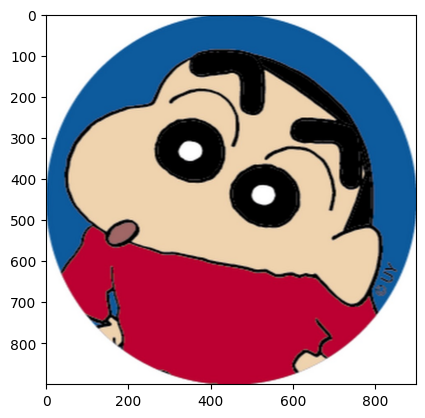

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

image = Image.open("./data/x-target-img/shin-chan.png")

transform = transforms.Compose(
    transforms=[
        # Escala de grises con 1 canal
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((28, 28)),
        transforms.PILToTensor(),
    ]
)

img_tensor = transform(image)

# Se espera que el tensor tenga un formato (height, width, channels), pero el tensor que estás pasando tiene el formato (channels, height, width), típico de PyTorch.
plt.imshow(image)
plt.savefig(f"./results/images/plt-shin-chan.png")

In [17]:
from tests.experiments.celeba.experiment_dcgan import Experiment_DCGAN as Experiment_DCGAN_CELEBA
class ParserOpt:
    def __init__(self):
        self.experiment_key = "temp"
        self.attack = "red"
        self.lambda_hy = 0.1
        self.batch_size = 32
        self.max_iter = 100
        self.latent_dim = 100
        self.type_latent_dim = "4d"
        self.channels = 3
        self.path_x_target = "./data/x-target/shin-chan-3x64x64.npy"
        self.path_z_trigger = "./data/z-trigger/z_trigger_shape_1-100-1-1.npy"
        self.model = "DCGAN_CELEBA"
        self.img_size = 64
        self.path_gen = "./models/celeba/dcgan/generator_64_104304.pth"
        self.path_dis = "./models/celeba/dcgan/discriminator_64_104304.pth"
        self.verbose = 50
        self.seed = 42

# Crear una instancia
parser_opt = ParserOpt()

experiment = Experiment_DCGAN_CELEBA(parser_opt)


Experiment key, temp
x_target  Type:  <class 'numpy.ndarray'>
x_target Shape:  (3, 64, 64)
Deterministic algorithms are enabled
x_target  Type:  <class 'numpy.ndarray'>
x_target Shape:  (3, 64, 64)


In [22]:
from tests.experiments.experiment__runner import ExperimentRunner

experiment_runner = ExperimentRunner(parser_opt=parser_opt, experiment=experiment)

In [23]:
%%time
experiment_runner.run_all()

====== ATTACK RED ======
====== Init Poisoning Estimator ======
Iteration: 0, Fidelity: 0.036908116191625595
Iteration: 50, Fidelity: 0.01357140764594078
====== Finished Poisoning Estimator ======
====== red_model ======
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNo